## Observations and Insights 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_dataset = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview --> see 1893 total rows 
complete_dataset.head()

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  Tumour Volume (mm3)  Metastatic Sites
0        k403     Ramicane    Male          21          16          0            45.000000                 0
1        k403     Ramicane    Male          21          16          5            38.825898                 0
2        k403     Ramicane    Male          21          16         10            35.014271                 1
3        k403     Ramicane    Male          21          16         15            34.223992                 1
4        k403     Ramicane    Male          21          16         20            32.997729                 1
5        k403     Ramicane    Male          21          16         25            33.464577                 1
6        k403     Ramicane    Male          21          16         30            31.099498                 1
7        k403     Ramicane    Male          21          16         35            26.546993                 1
8        k403     R

In [25]:
# Checking the number of mice. (Number of unique mice IDs)
total_unique_mice = complete_dataset["Mouse ID"].unique()

# printing to check the total number of unique mice.
print(len(total_unique_mice))

249


In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
complete_dataset.loc[complete_dataset.duplicated(subset=['Mouse ID','Timepoint']), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mice_id_timepoint_df = complete_dataset.drop_duplicates(["Mouse ID", "Timepoint"])

# Checking the number of mice in the clean DataFrame.
# now 5 duplicate rows (duplicate ID and Timepoint) have been removed so total 1888 rows
len(unique_mice_id_timepoint_df)

1888

## Summary Statistics

In [28]:
# grouping the Data Frame by Drug Regimen and Tumour Volume
grouped_drug_regiment_Tumor_df = unique_mice_id_timepoint_df.groupby(["Drug Regimen"])['Tumour Volume (mm3)']

In [29]:
# finding measures of central tendency of the Dataframe grouped in previous cell

#  Median
Drug_Regimen_median = grouped_drug_regiment_Tumor_df.median()

#  Mean
Drug_Regimen_mean = grouped_drug_regiment_Tumor_df.mean()

#  Variance
Drug_Regimen_variance = grouped_drug_regiment_Tumor_df.var()

#  Standard Deviation
Drug_Regimen_st = grouped_drug_regiment_Tumor_df.std()

#  Standard Error of the Mean (SEM)
Drug_Regimen_sem = grouped_drug_regiment_Tumor_df.sem()

#  Creating a new Data Frame containing the measures of central tendency
summary_df = pd.concat([Drug_Regimen_median, Drug_Regimen_mean, Drug_Regimen_variance, Drug_Regimen_st, Drug_Regimen_sem], axis=1)

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# assigning column names to the Summary Data Frame
summary_df.columns = ['Tumour Volume (mm3) Median', "Tumour Volume (mm3) Mean", "Tumour Volume (mm3) Variance", "Tumour Volume (mm3) Standard Deviation", "Tumour Volume (mm3) SEM"]

# Printing Summary Data Frame
summary_df

,Tumour Volume (mm3) Median,Tumour Volume (mm3) Mean,Tumour Volume (mm3) Variance,Tumour Volume (mm3) Standard Deviation,Tumour Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,41.557809,40.675741,24.947764,4.994774,0.329346
Ceftamin,51.776157,52.591172,39.290177,6.268188,0.469821
Infubinol,51.820584,52.884795,43.128684,6.567243,0.492236
Ketapril,53.698743,55.235638,68.553577,8.279709,0.603860
Naftisol,52.509285,54.331565,66.173479,8.134708,0.596466
Placebo,52.288934,54.033581,61.168083,7.821003,0.581331
Propriva,50.909965,52.393463,43.138803,6.568014,0.525862
Ramicane,40.673236,40.216745,23.486704,4.846308,0.320955
Stelasyn,52.431737,54.233149,59.450562,7.710419,0.573111


In [30]:
# Using the aggregation method, producing the same summary statistics in a single line
agg_func = unique_mice_id_timepoint_df.groupby(
    "Drug Regimen"
    ).agg(
    {
        "Tumour Volume (mm3)": ["median", "mean", "var", "std", "sem"]
    }
)

agg_func

Tumour Volume (mm3)                                          
                          median       mean        var       std       sem
Drug Regimen                                                              
Capomulin              41.557809  40.675741  24.947764  4.994774  0.329346
Ceftamin               51.776157  52.591172  39.290177  6.268188  0.469821
Infubinol              51.820584  52.884795  43.128684  6.567243  0.492236
Ketapril               53.698743  55.235638  68.553577  8.279709  0.603860
Naftisol               52.509285  54.331565  66.173479  8.134708  0.596466
Placebo                52.288934  54.033581  61.168083  7.821003  0.581331
Propriva               50.909965  52.393463  43.138803  6.568014  0.525862
Ramicane               40.673236  40.216745  23.486704  4.846308  0.320955
Stelasyn               52.431737  54.233149  59.450562  7.710419  0.573111
Zoniferol              51.818479  53.236507  48.533355  6.966589  0.516398

## Bar and Pie Charts

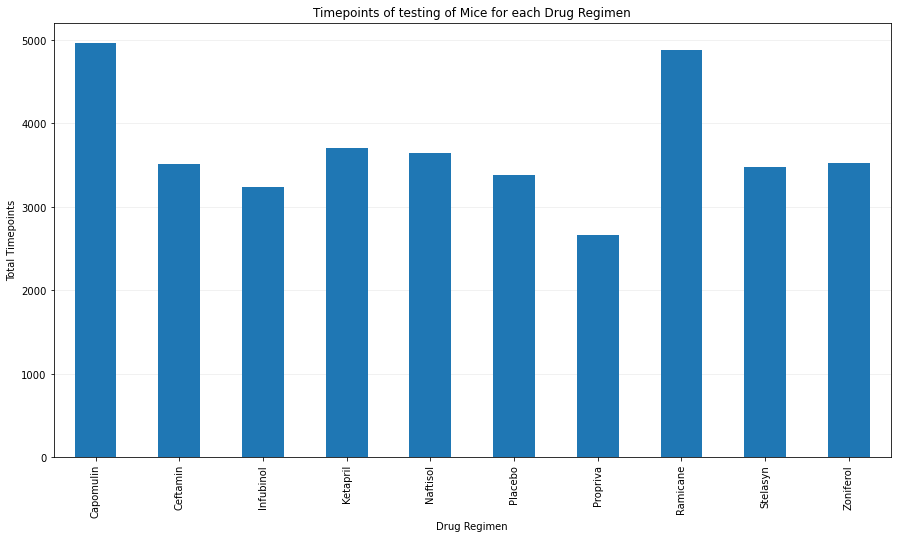

In [31]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# grouping by Timepoint sum for each drug
grouped_drug_regiment_df = unique_mice_id_timepoint_df.groupby(["Drug Regimen"])["Timepoint"].sum()

# plotting
plot1 = grouped_drug_regiment_df.plot(kind="bar", x ='Drug Regimen', y = 'Timepoint', title = "Timepoints of testing of Mice for each Drug Regimen", figsize=(15,8), zorder=5)

# setting labels and grid
plot1.set_ylabel("Total Timepoints")
plot1.set_xlabel("Drug Regimen")
plot1.yaxis.grid(True, color="#EEEEEE")

([<matplotlib.axis.XTick at 0x1f8c6bfec08>,
 <a list of 10 Text major ticklabel objects>)

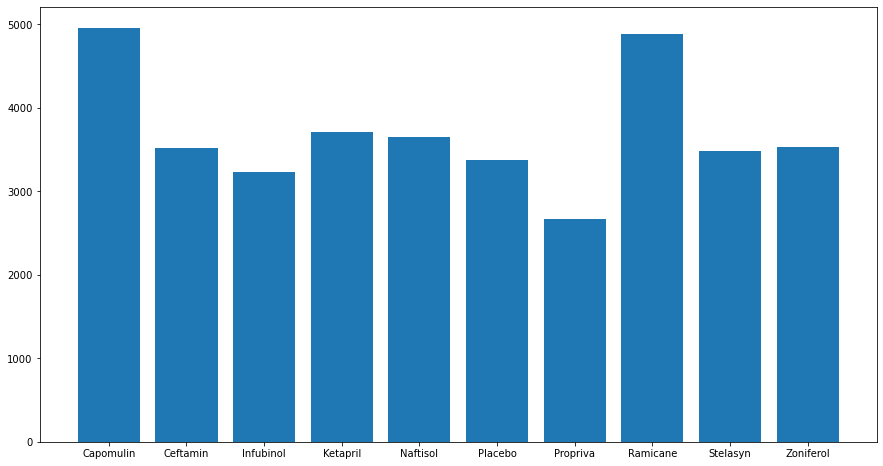

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#  Using matplotlib -> pyplot

x_axis = grouped_drug_regiment_df.index.values
tick_locations = [value for value in x_axis]

y_axis = grouped_drug_regiment_df[tick_locations]

plt.figure(figsize=(15,8))
plt.bar(x_axis, y_axis)
plt.xticks(tick_locations)



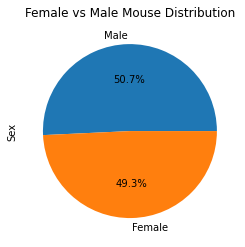

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# getting valuecounts according to 'Sex' column 
sex_counts = unique_mice_id_timepoint_df['Sex'].value_counts()

# plotting pie plot
plot3 = sex_counts.plot.pie(autopct= "%1.1f%%", title="Female vs Male Mouse Distribution")
plt.show()

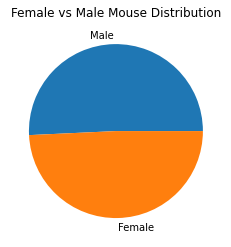

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# using matplotlib --> pyplot

#  creating empty lists for each data
sex = []
total_count_sex = []

for x, y in sex_counts.items():
    sex.append(x)
    total_count_sex.append(y)

plt.pie(total_count_sex, labels=sex)
plt.title("Female vs Male Mouse Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

# Dropping the duplicaates mice and only keeping 1 with the greatest Timepoint
unique_merged_df = complete_dataset.sort_values('Timepoint', ascending=False).drop_duplicates('Mouse ID').sort_index()
unique_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [36]:
# creating a list of selected drugs for next phase of analysis 
selected_drugs = ["Capomulin", "Ramicane", "Ceftamin", "Infubinol"]


# Create empty list to fill with tumour vol data (for plotting)
tumour_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumour volumes
    # add subset 
    # Determine outliers using upper and lower bounds



# creating a for loop to loop through the DataFrame for each selected drug..
# ..and fill the empty list of tumour_vol with the tumour volumes of mice given any of these selected drugs  
for drug in selected_drugs:
    for index, row in unique_merged_df.iterrows():
        if row["Drug Regimen"] == drug:
            tumour_vol.append(row["Tumour Volume (mm3)"])

# sorting the list
tumour_vol = sorted(tumour_vol)

# creating a Data Frame of the tumour_vol list
tumour_vol_df = pd.DataFrame(tumour_vol, columns=['Volume'])

# making quartiles
quartiles = tumour_vol_df.quantile([.25,.5,.75])

# finding lower quartile, upper quartile and interquartile range
lowerq = quartiles.Volume[0.25]
upperq = quartiles.Volume[0.75]
iqr = upperq-lowerq

# calculating lower and upper bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# printing the results
print(f'Lower Bound of Tumour Volume(mm3) is: {lowerq}')
print(f'Upper bound of Tumour Volume(mm3) is: {upperq}')
print(f'The interquartile range of Tumour Volume(mm3) is: {iqr}')
print(f'The median of Tumour Volume(mm3) is: {quartiles.Volume[0.5]}')

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Lower Bound of Tumour Volume(mm3) is: 37.187743802499995
Upper bound of Tumour Volume(mm3) is: 59.930261755000004
The interquartile range of Tumour Volume(mm3) is: 22.74251795250001
The median of Tumour Volume(mm3) is: 45.0
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


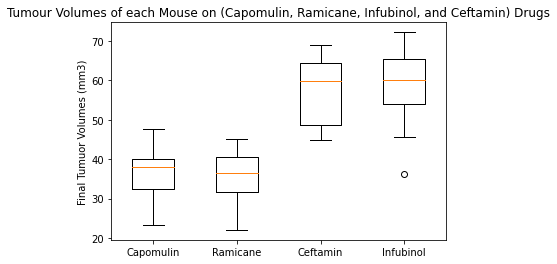

In [37]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

# creating the empty list for tumour volumes of mice given Capomulin drug
tumour_vol_Capomulin = []

# filling the list of tumour volumes
for index, row in unique_merged_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumour_vol_Capomulin.append(row["Tumour Volume (mm3)"])

# sorting the list
tumour_vol_Capomulin = sorted(tumour_vol_Capomulin)


# creating the empty list for tumour volumes of mice given Ramicane drug
tumour_vol_Ramicane = []

# filling the list of tumour volumes
for index, row in unique_merged_df.iterrows():
    if row["Drug Regimen"] == 'Ramicane':
        tumour_vol_Ramicane.append(row["Tumour Volume (mm3)"])

# sorting the list
tumour_vol_Ramicane = sorted(tumour_vol_Ramicane)


# creating the empty list for tumour volumes of mice given Ceftamin drug
tumour_vol_Ceftamin = []

# filling the list of tumour volumes
for index, row in unique_merged_df.iterrows():
    if row["Drug Regimen"] == 'Ceftamin':
        tumour_vol_Ceftamin.append(row["Tumour Volume (mm3)"])

# sorting the list
tumour_vol_Ceftamin = sorted(tumour_vol_Ceftamin)


# creating the empty list for tumour volumes of mice given Infubinol drug
tumour_vol_Infubinol = []

# filling the list of tumour volumes
for index, row in unique_merged_df.iterrows():
    if row["Drug Regimen"] == 'Infubinol':
        tumour_vol_Infubinol.append(row["Tumour Volume (mm3)"])

# sorting the list
tumour_vol_Infubinol = sorted(tumour_vol_Infubinol)

# creating a nested list containing the list of tumour volumes of mice given one of these selected drugs
tumour_volumes_all_drugs = [tumour_vol_Capomulin, tumour_vol_Ramicane, tumour_vol_Ceftamin, tumour_vol_Infubinol]

#  plotting a box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Tumour Volumes of each Mouse on (Capomulin, Ramicane, Infubinol, and Ceftamin) Drugs')
ax1.set_ylabel("Final Tumuor Volumes (mm3)")
ax1.boxplot(tumour_volumes_all_drugs, labels=selected_drugs, widths= 0.5, vert= True)
plt.show()

## Line and Scatter Plots

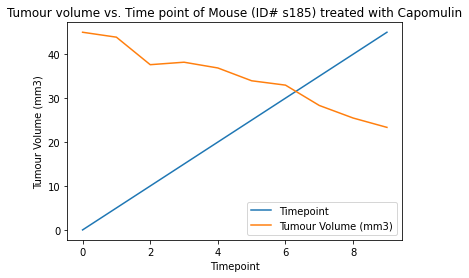

In [38]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

# I have selected mouse with ID s185 which was given the drug Capomulin

# creating a Data Frame of s185 mouse
s185_df = unique_mice_id_timepoint_df.loc[unique_mice_id_timepoint_df['Mouse ID'] == 's185', :]

# getting a list of all of its timepoints
s185_timepoint = list(s185_df['Timepoint'])

# getting a list of all of its Tumour Volume data
s185_tum_vol = list(s185_df['Tumour Volume (mm3)'])

# Plotting line plot
plt.plot(s185_timepoint)
plt.plot(s185_tum_vol)
plt.title('Tumour volume vs. Time point of Mouse (ID# s185) treated with Capomulin')
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")
plt.legend(['Timepoint', 'Tumour Volume (mm3)'], loc='lower right')
plt.show()

Text(0, 0.5, 'Weight (g)')

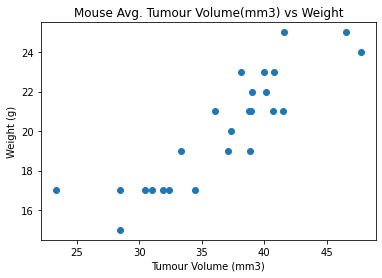

In [39]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

# creating a dataframe of all mice given Capomulin
capomulin_df = unique_merged_df.loc[unique_merged_df['Drug Regimen'] == 'Capomulin', :]

# plotting a scatter plot of Tumour Volume vs Weight
plt.scatter(capomulin_df['Tumour Volume (mm3)'],capomulin_df['Weight (g)'])
plt.title('Mouse Avg. Tumour Volume(mm3) vs Weight')
plt.xlabel('Tumour Volume (mm3)')
plt.ylabel('Weight (g)')

## Correlation and Regression

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

# calculating correlation
correlation = st.pearsonr(capomulin_df['Weight (g)'],capomulin_df['Tumour Volume (mm3)'])

print(f'Coorrelation between Mouse Weight and Avg. Tumour Volume is: {correlation[0]}')

Coorrelation between Mouse Weight and Avg. Tumour Volume is: 0.8767060403658116


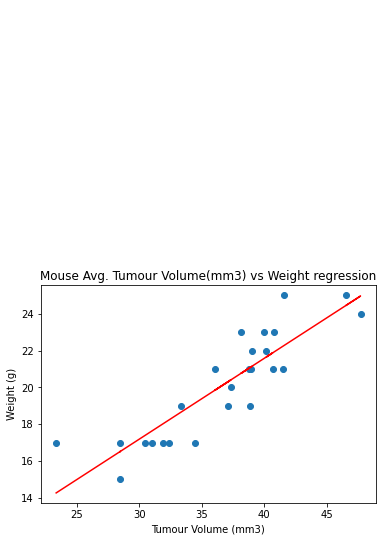

In [41]:
# calculating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_df['Tumour Volume (mm3)'], capomulin_df["Weight (g)"])

regress_values = capomulin_df['Tumour Volume (mm3)'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plotting
plt.scatter(capomulin_df['Tumour Volume (mm3)'],capomulin_df['Weight (g)'])

plt.plot(capomulin_df['Tumour Volume (mm3)'], regress_values, color='red')

plt.annotate(line_eq,(20, 40),fontsize=15,color="red")

plt.title('Mouse Avg. Tumour Volume(mm3) vs Weight regression')
plt.xlabel('Tumour Volume (mm3)')
plt.ylabel('Weight (g)')

plt.show()